Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Erste Zeilen des Datensatzes:
       Name  Age   BMI  BloodPressure  Cholesterol  Disease
0  Patient1   45  23.4            120          200        0
1  Patient2   56  27.5            135          220        1
2  Patient3   34  22.1            110          180        0
3  Patient4   65  30.2            140          240        1
4  Patient5   29  19.8            115          190        0
Genauigkeit: 1.00

Klassifikationsbericht:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



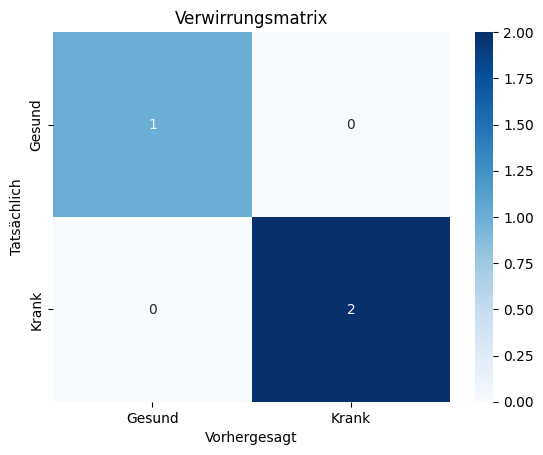

Vorhergesagter Krankheitsstatus für einen Patienten mit Alter 50, BMI 26.0, Blutdruck 130, und Cholesterin 210:Krank
Modellparameter:

'C': 1.0 -- Inverse of regularization strength
'class_weight': None -- Weights associated with classes
'dual': False -- Dual or primal formulation
'fit_intercept': True -- Whether to include an intercept
'intercept_scaling': 1 -- Scaling of the intercept
'l1_ratio': None -- Elastic-Net mixing parameter
'max_iter': 1000 -- Maximum number of iterations
'multi_class': auto -- Multi-class option
'n_jobs': None -- Number of CPU cores used
'penalty': l2 -- Norm used in the penalization
'random_state': None -- Seed for random number generation
'solver': lbfgs -- Algorithm to use in the optimization
'tol': 0.0001 -- Tolerance for stopping criteria
'verbose': 0 -- Verbosity mode
'warm_start': False -- Reuse the solution of the previous call


            Parameter Aktueller Wert                             Beschreibung
0                   C            1.0       

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [46]:
# Logistische Regression zur Klassifikation von Patienten in Python
# Teil 1: Importieren der notwendigen Bibliotheken
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
from google.colab import drive


drive.mount('/content/drive')

# Teil 2: Daten einlesen
file_path = '/content/drive/MyDrive/Python_DataScience/ML/DiseaseListe1.csv' #ggf. Pfad zur .csv ergänzen / file_path = 'DiseaseListe1.csv'
df = pd.read_csv(file_path)

# Überprüfen der ersten Zeilen des DataFrames
print("Erste Zeilen des Datensatzes:")
print(df.head())

# Teil 3: Datenvorbereitung
X = df[['Age', 'BMI', 'BloodPressure', 'Cholesterol']] # Merkmale
y = df['Disease'] # Zielvariable

# Aufteilen der Daten in Trainings- und Testdatensatz
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.3, random_state=42)

# Teil 4: Modell erstellen und trainieren
model = LogisticRegression(max_iter=1000) # max_iter erhöht die maximale Anzahl der Iterationen, falls erforderlich
model.fit(X_train, y_train)


# Teil 5: Modellbewertung
# Vorhersagen auf den Testdaten
y_pred = model.predict(X_test)

# Berechnung der Leistungsmetriken
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f"Genauigkeit: {accuracy:.2f}")
print("\nKlassifikationsbericht:")
print(class_report)

# Verwirrungsmatrix anzeigen
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
xticklabels=['Gesund', 'Krank'], yticklabels=['Gesund', 'Krank'])
plt.title('Verwirrungsmatrix')
plt.xlabel('Vorhergesagt')
plt.ylabel('Tatsächlich')
plt.show()

# Teil 6: Modellanwendung
def predict_disease(age, bmi, blood_pressure, cholesterol):
  features = np.array([[age, bmi, blood_pressure, cholesterol]])
  prediction = model.predict(features)
  return "Krank" if prediction[0] == 1 else "Gesund"

# Beispielvorhersage
example_patient = (50, 26.0, 130, 210)
predicted_status = predict_disease(*example_patient)
print(f"Vorhergesagter Krankheitsstatus für einen Patienten mit Alter {example_patient[0]}, BMI {example_patient[1]}, Blutdruck {example_patient[2]}, und Cholesterin {example_patient[3]}:{predicted_status}")

# Teil 7: Modellparameter
params = model.get_params()

params_text = ["Inverse of regularization strength", "Weights associated with classes", "Dual or primal formulation", "Whether to include an intercept", "Scaling of the intercept", "Elastic-Net mixing parameter", "Maximum number of iterations", "Multi-class option", "Number of CPU cores used", "Norm used in the penalization", "Seed for random number generation", "Algorithm to use in the optimization", "Tolerance for stopping criteria", "Verbosity mode", "Reuse the solution of the previous call"]

print("Modellparameter:\n")
count = 0
for key, value in params.items():
  if count == len(params_text):
    count = 0
    break

  print(f"'{key}': {value} -- {params_text[count]}")
  count += 1


# DataFrame Alternative
print("\n")

data = []
count = 0

for key, value in params.items():
    data.append([key, value, params_text[count]])

    count += 1
    if count == len(params_text):
        count = 0
        break

df_params = pd.DataFrame(data, columns=['Parameter', 'Aktueller Wert', 'Beschreibung'])

# DataFrame ausgeben
print(df_params, "\n")